In [12]:
import warnings

warnings.filterwarnings("ignore")

In [13]:
from flowermd.library import PPS

molecules = PPS(num_mols=10, lengths=8)

In [14]:
from flowermd.base import Pack
system = Pack(molecules=molecules, density=0.5, packing_expand_factor=5) 

In [15]:
from flowermd.library import OPLS_AA_PPS

system.apply_forcefield(
    r_cut=2.5, force_field=OPLS_AA_PPS(), auto_scale=True, scale_charges=True
)

In [16]:
system.hoomd_snapshot

In [17]:
hoomd_forces = system.hoomd_forcefield
hoomd_forces

In [18]:
lj_force = hoomd_forces[3]
dict(lj_force.params)

{('ca',
  'ca'): _HOOMDDict{'epsilon': np.float64(0.16470588235294115), 'sigma': np.float64(0.9861111111111112)},
 ('ca',
  's'): _HOOMDDict{'epsilon': np.float64(0.37091488871610456), 'sigma': np.float64(0.9930312739844155)},
 ('ca',
  'ha'): _HOOMDDict{'epsilon': np.float64(0.10782531046954916), 'sigma': np.float64(0.8141779918845362)},
 ('ca',
  'sh'): _HOOMDDict{'epsilon': np.float64(0.40583972495671383), 'sigma': np.float64(0.9930312739844155)},
 ('ca',
  'hs'): _HOOMDDict{'epsilon': np.float64(0.0), 'sigma': np.float64(0.0)},
 ('s',
  's'): _HOOMDDict{'epsilon': np.float64(0.8352941176470587), 'sigma': np.float64(1.0)},
 ('ha',
  's'): _HOOMDDict{'epsilon': np.float64(0.2428207934182387), 'sigma': np.float64(0.8198915917499229)},
 ('s',
  'sh'): _HOOMDDict{'epsilon': np.float64(0.9139442639718566), 'sigma': np.float64(1.0)},
 ('hs', 's'): _HOOMDDict{'epsilon': np.float64(0.0), 'sigma': np.float64(0.0)},
 ('ha',
  'ha'): _HOOMDDict{'epsilon': np.float64(0.07058823529411763), 'sigm

In [19]:
from flowermd.base import Simulation 

sim = Simulation.from_system(
    system=system, gsd_write_freq=100, log_write_freq=100
)

Initializing simulation state from a gsd.hoomd.Frame.


In [20]:
from flowermd.utils import get_target_box_mass_density

target_box = get_target_box_mass_density(
    density=system.density, mass=system.mass.to("g")
)
print(target_box)

[3.06534572e-07 3.06534572e-07 3.06534572e-07] cm


In [21]:
sim.density.to("g/cm**3")

unyt_quantity(0.004, 'g/cm**3')

In [22]:
sim.run_update_volume(
    n_steps=1000, period=1, kT=1, tau_kt=1, final_box_lengths=target_box
)

*Warning*: charge.pppm: RMS error of 0.500587 is probably too high! 0.500587 0.500484


Step 100 of 1000; TPS: 415.79; ETA: 0.0 minutes
Step 200 of 1000; TPS: 563.65; ETA: 0.0 minutes
Step 300 of 1000; TPS: 633.46; ETA: 0.0 minutes
Step 400 of 1000; TPS: 668.84; ETA: 0.0 minutes
Step 500 of 1000; TPS: 684.83; ETA: 0.0 minutes
Step 600 of 1000; TPS: 687.94; ETA: 0.0 minutes
Step 700 of 1000; TPS: 680.68; ETA: 0.0 minutes
Step 800 of 1000; TPS: 663.86; ETA: 0.0 minutes
Step 900 of 1000; TPS: 632.2; ETA: 0.0 minutes
Step 1000 of 1000; TPS: 570.56; ETA: 0.0 minutes


In [23]:
sim.density.to("g/cm**3")

unyt_quantity(0.5, 'g/cm**3')

In [24]:
import hoomd

for writer in sim.operations.writers: 
    if isinstance(writer, hoomd.write.GSD):
        writer.flush()

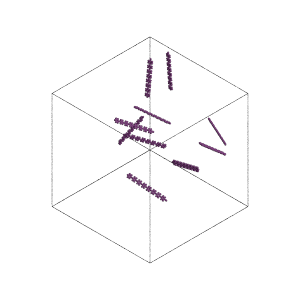

In [25]:
from cmeutils.visualize import FresnelGSD

sim_visualizer = FresnelGSD(
    gsd_file="trajectory.gsd", frame=0, view_axis=(1, 1, 1)
)
sim_visualizer.view()

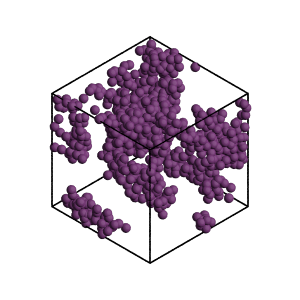

In [26]:
sim_visualizer.frame = -1
sim_visualizer.view()

In [27]:
sim.run_NVT(n_steps=2000, kT=1.0, tau_kt=0.01)

Step 99 of 2000; TPS: 276.35; ETA: 0.1 minutes
Step 199 of 2000; TPS: 280.31; ETA: 0.1 minutes
Step 299 of 2000; TPS: 280.13; ETA: 0.1 minutes
Step 399 of 2000; TPS: 280.67; ETA: 0.1 minutes
Step 499 of 2000; TPS: 282.48; ETA: 0.1 minutes
Step 599 of 2000; TPS: 283.78; ETA: 0.1 minutes
Step 699 of 2000; TPS: 284.33; ETA: 0.1 minutes
Step 799 of 2000; TPS: 284.76; ETA: 0.1 minutes
Step 899 of 2000; TPS: 285.5; ETA: 0.1 minutes
Step 999 of 2000; TPS: 285.79; ETA: 0.1 minutes
Step 1099 of 2000; TPS: 284.99; ETA: 0.1 minutes
Step 1199 of 2000; TPS: 285.58; ETA: 0.0 minutes
Step 1299 of 2000; TPS: 285.87; ETA: 0.0 minutes
Step 1399 of 2000; TPS: 286.38; ETA: 0.0 minutes
Step 1499 of 2000; TPS: 287.15; ETA: 0.0 minutes
Step 1599 of 2000; TPS: 287.5; ETA: 0.0 minutes
Step 1699 of 2000; TPS: 287.9; ETA: 0.0 minutes
Step 1799 of 2000; TPS: 288.44; ETA: 0.0 minutes
Step 1899 of 2000; TPS: 288.78; ETA: 0.0 minutes
Step 1999 of 2000; TPS: 289.46; ETA: 0.0 minutes


In [28]:
for writer in sim.operations.writers: 
    if isinstance(writer, hoomd.write.GSD):
        writer.flush()

In [ ]:
sim_visualizer.frame = -1
sim_visualizer.view()